# BGURacing Home Assignment

in this notebook we will use an AI model (YOLOv8) to detect cones in images.
the dataset used to train the model is:
https://universe.roboflow.com/segmentation-qgfyu/traffic-cone-6ula4

make sure hardware acceleration is enabled:

if not, go to *Edit* -> *notebook settings* -> make sure *hardware accelerator* is enabled (T4 GPU).

if hardware acceleration can't be used due to usage limits in Google Colab, all the code can still be used except the "Train our model" section



In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Initialize some helper utilities:

In [2]:
import os
HOME = os.getcwd()

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


Next we need to train the model, if you want you can do so yourself in the following section, but this task can take some time to complete. you can skip it and instead read the model i pre-trained and saved in the github repository for later use.

To train the model yourself use the [Train out model](https://colab.research.google.com/drive/1mrrKlzPRCOX9K_R0PSDmJpnfk42tKvZU?authuser=1#scrollTo=DhgqnUq0nPVZ&line=2&uniqifier=1) section.

To read the pre-trained model use the [Read pre-trained model](https://colab.research.google.com/drive/1mrrKlzPRCOX9K_R0PSDmJpnfk42tKvZU?authuser=1#scrollTo=JZPkV5sbncr4&line=1&uniqifier=1) section.

### Train our model:

train the model on our dataset

Retrieve the dataset from Roboflow:

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow==1.1.48 --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XRUv9mBEsjhDJLL9Dqic")
project = rf.workspace("segmentation-qgfyu").project("traffic-cone-6ula4")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to traffic-cone-1 in yolov8:: 100%|██████████| 8069/8069 [00:01<00:00, 4338.81it/s]


Run the command to train the model on our dataset:

In [ ]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 plots=True

/content
100% 22.8M/22.8M [00:00<00:00, 414MB/s]
New https://pypi.org/project/ultralytics/8.3.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/traffic-cone-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

Our model is now trained on the dataset.
if you want to look at the training results and validate the model with the dataset you can run the code in the next 2 cells, but i recommend skipping this and moving on to the [Work with the model](https://colab.research.google.com/drive/1mrrKlzPRCOX9K_R0PSDmJpnfk42tKvZU?authuser=1#scrollTo=RAnCEkPNnl77) section where we test the model on example images from the video you provided me.

In [ ]:
# Model Training Results
display(Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600))
display(Image(filename=f'{HOME}/runs/segment/train/results.png', width=600))
display(Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600))

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/traffic-cone-1/valid/labels.cache... 806 images, 0 backgrounds, 0 corrupt: 100% 806/806 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 51/51 [00:16<00:00,  3.08it/s]
                   all        806       1486      0.949      0.927      0.974      0.874      0.939      0.917      0.962      0.853
Speed: 0.8ms preprocess, 11.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# Model Validation
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

### Read pre-trained model:

read the pre-trained model from the github repo




In [3]:
import requests
from pathlib import Path

def read_model(url_path, output_path_full):

  response = requests.get(url)
  if response.status_code == 200:
    save_path = Path(output_path_full)
    save_path.parent.mkdir(parents=True, exist_ok=True)
    # Open the local file in write-binary mode and save the content
    with open(output_path_full, 'wb') as file:
        file.write(response.content)
    print(f"Pre-trained model weights saved {output_path_full}")
  else:
    print(f"Failed to download the file. Status code: {response.status_code}")


url = 'https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/YOLOv8-seg%2015%20epochs.pt'
local_save_path = f'{HOME}/runs/segment/train/weights/best.pt'
read_model(url, local_save_path)


Pre-trained model weights saved /content/runs/segment/train/weights/best.pt


### Work with the model:

Read example images from the video provided in the homework task, we will use these images to test the model:

(the images are stored in the github project, we are reading them into a folder in the jupyter notebook)

In [4]:
import requests
from PIL import Image
from io import BytesIO
from pathlib import Path

def read_images(base_path, num_of_images, output_dir_path):
  images_nums = [i for i in range(1, num_of_images+1)]

  for index in images_nums:
    url = f'{base_path}/{index}.jpg'
    response = requests.get(url)
    if response.status_code == 200:
      image = Image.open(BytesIO(response.content))
      image_full_path = f'{output_dir_path}/{index}.jpg'
      save_path = Path(image_full_path)
      save_path.parent.mkdir(parents=True, exist_ok=True)
      image.save(image_full_path)
      print(f"Fetched image successfully, URL: {url}")
    else:
      print(f"Failed to fetch image. Status code: {response.status_code}, URL: {url}")

base_path = 'https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20track'
num_of_images = 11
local_dir_path = "/content/track images"
read_images(base_path, num_of_images, local_dir_path)


Fetched image successfully, URL: https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20track/1.jpg
Fetched image successfully, URL: https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20track/2.jpg
Fetched image successfully, URL: https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20track/3.jpg
Fetched image successfully, URL: https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20track/4.jpg
Fetched image successfully, URL: https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20track/5.jpg
Fetched image successfully, URL: https://raw.githubusercontent.com/Spyhunt/BGURacing-Autonomous/refs/heads/main/%E2%80%8F%E2%80%8Fexample%20photos%20from%20trac

run the model on the images we just read:


image 1/11 /content/track images/1.jpg: 384x640 5 traffic-cones, 810.8ms
image 2/11 /content/track images/10.jpg: 384x640 6 traffic-cones, 535.9ms
image 3/11 /content/track images/11.jpg: 384x640 4 traffic-cones, 522.3ms
image 4/11 /content/track images/2.jpg: 384x640 6 traffic-cones, 514.8ms
image 5/11 /content/track images/3.jpg: 384x640 6 traffic-cones, 513.9ms
image 6/11 /content/track images/4.jpg: 384x640 8 traffic-cones, 528.7ms
image 7/11 /content/track images/5.jpg: 384x640 6 traffic-cones, 512.2ms
image 8/11 /content/track images/6.jpg: 384x640 4 traffic-cones, 520.7ms
image 9/11 /content/track images/7.jpg: 384x640 4 traffic-cones, 510.0ms
image 10/11 /content/track images/8.jpg: 384x640 6 traffic-cones, 524.6ms
image 11/11 /content/track images/9.jpg: 384x640 5 traffic-cones, 511.3ms
Speed: 4.0ms preprocess, 545.9ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


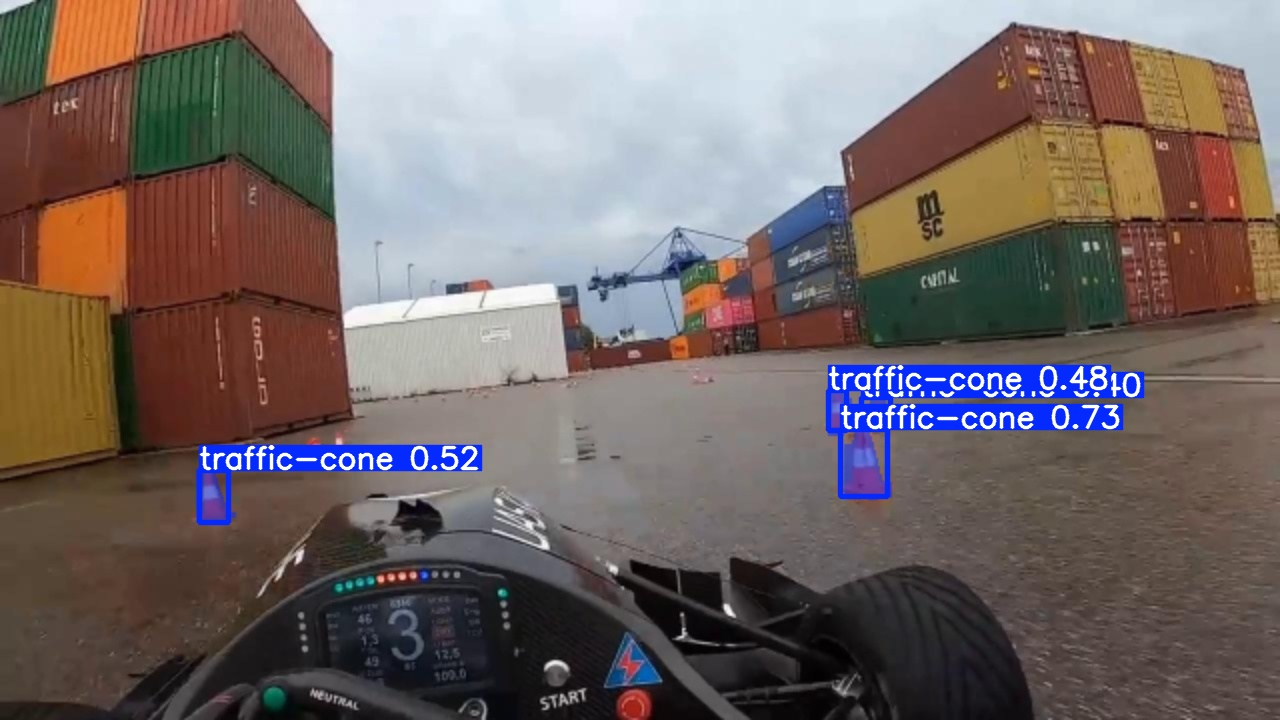

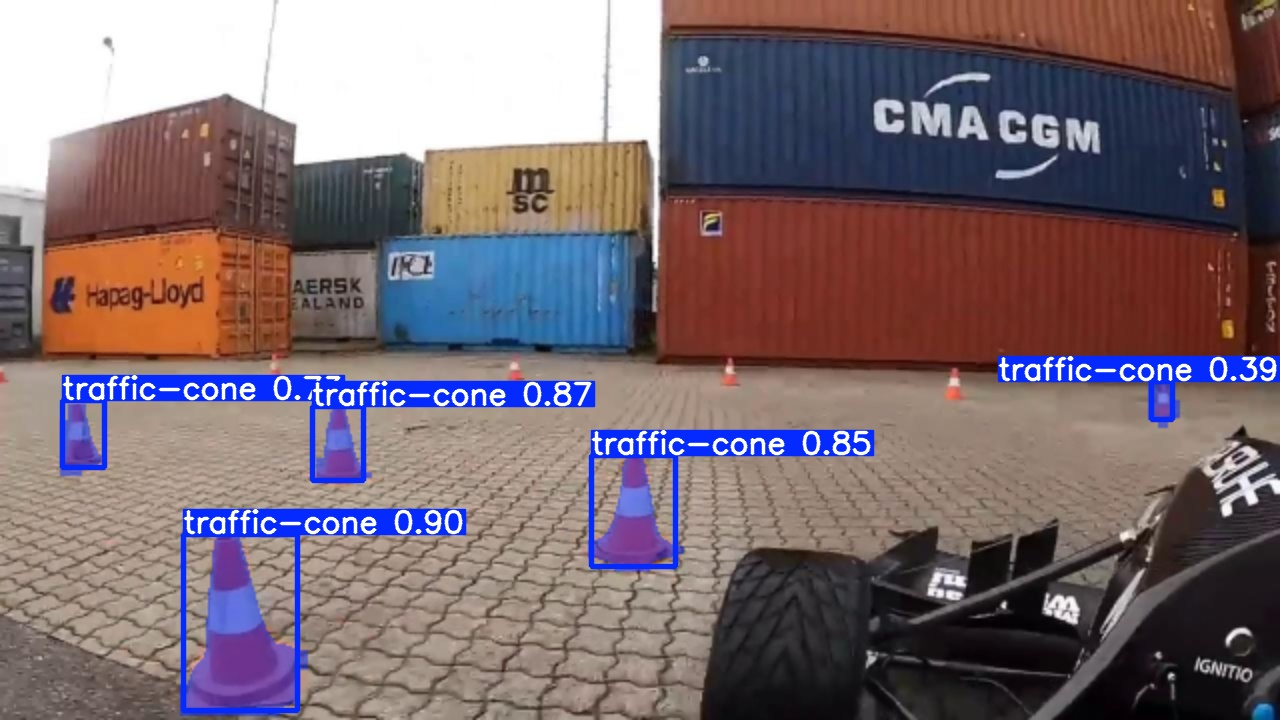

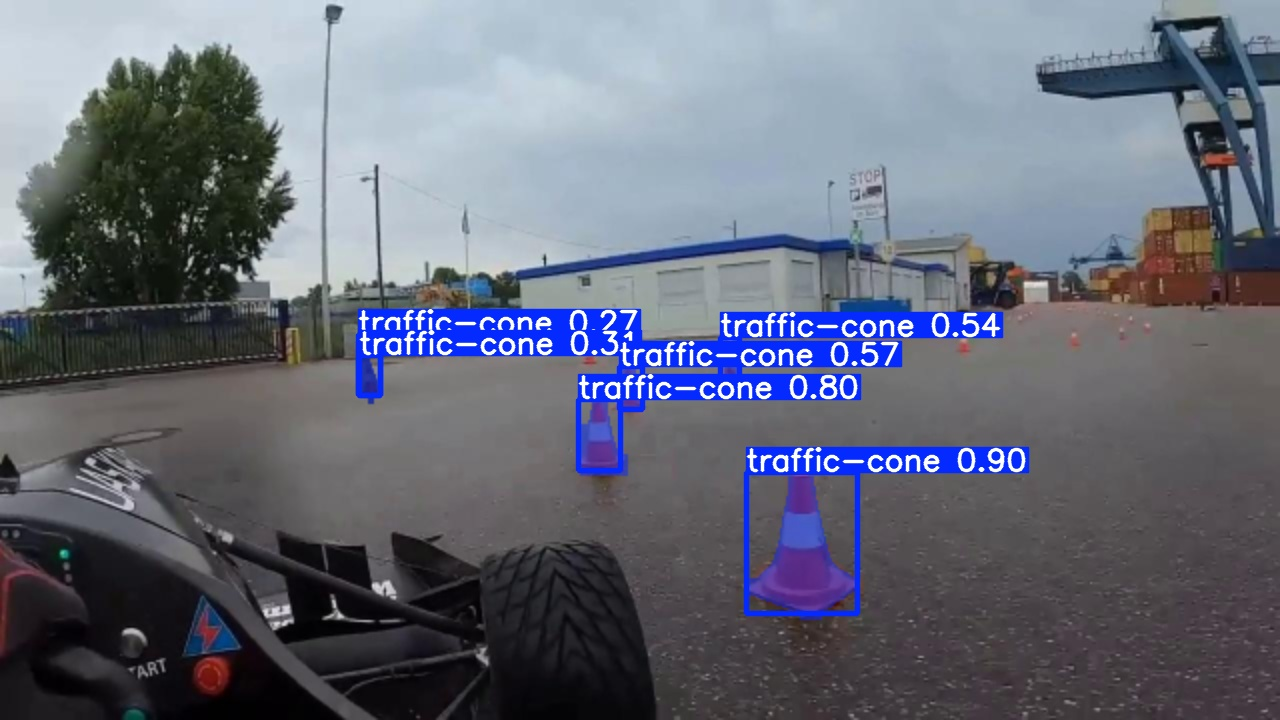

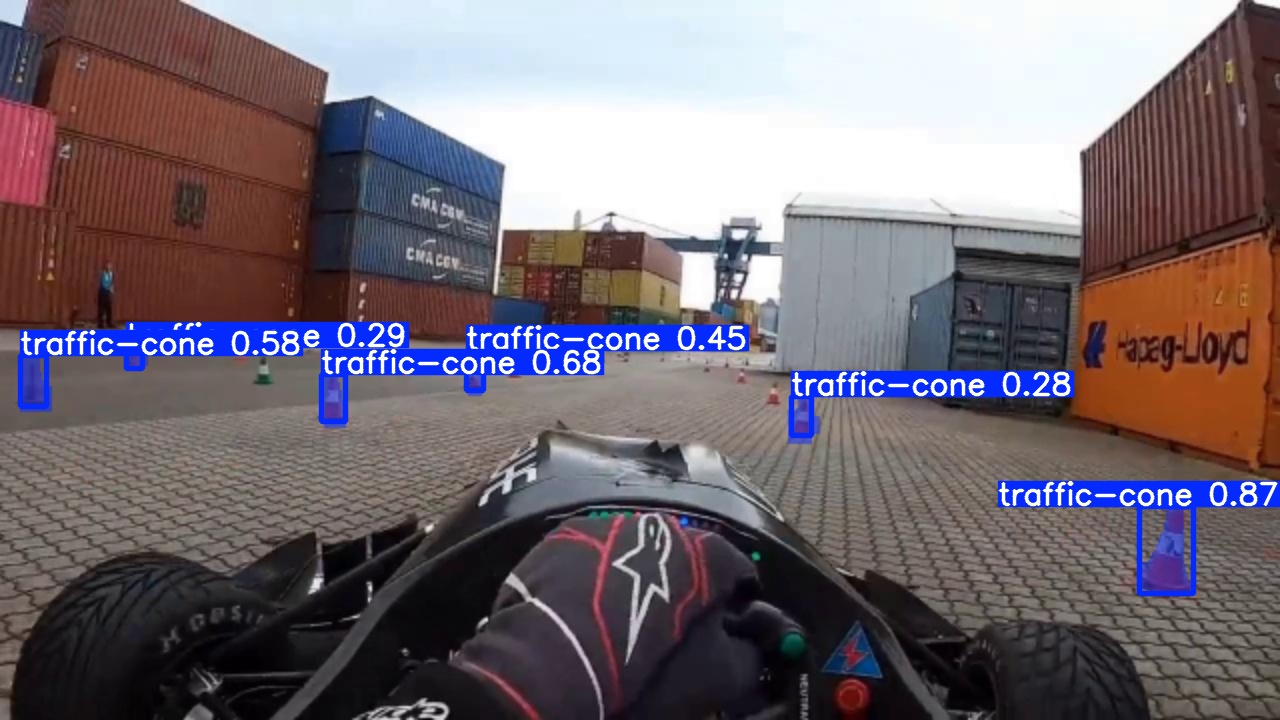

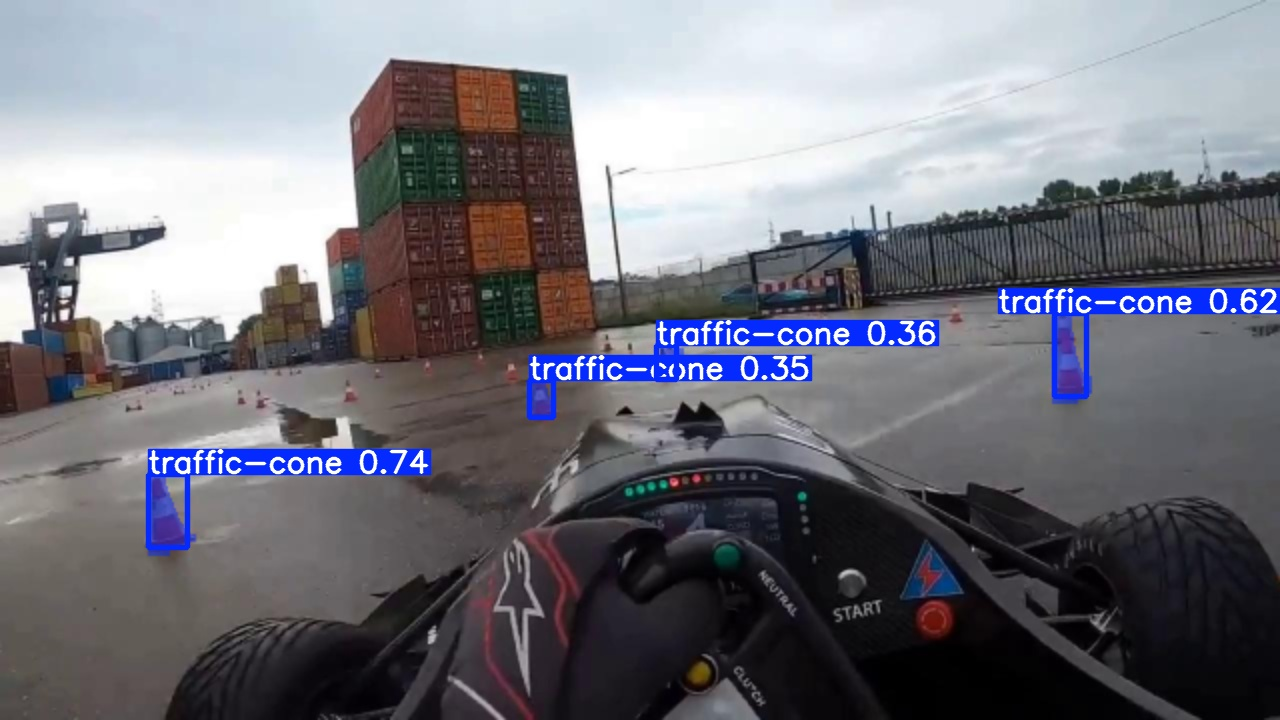

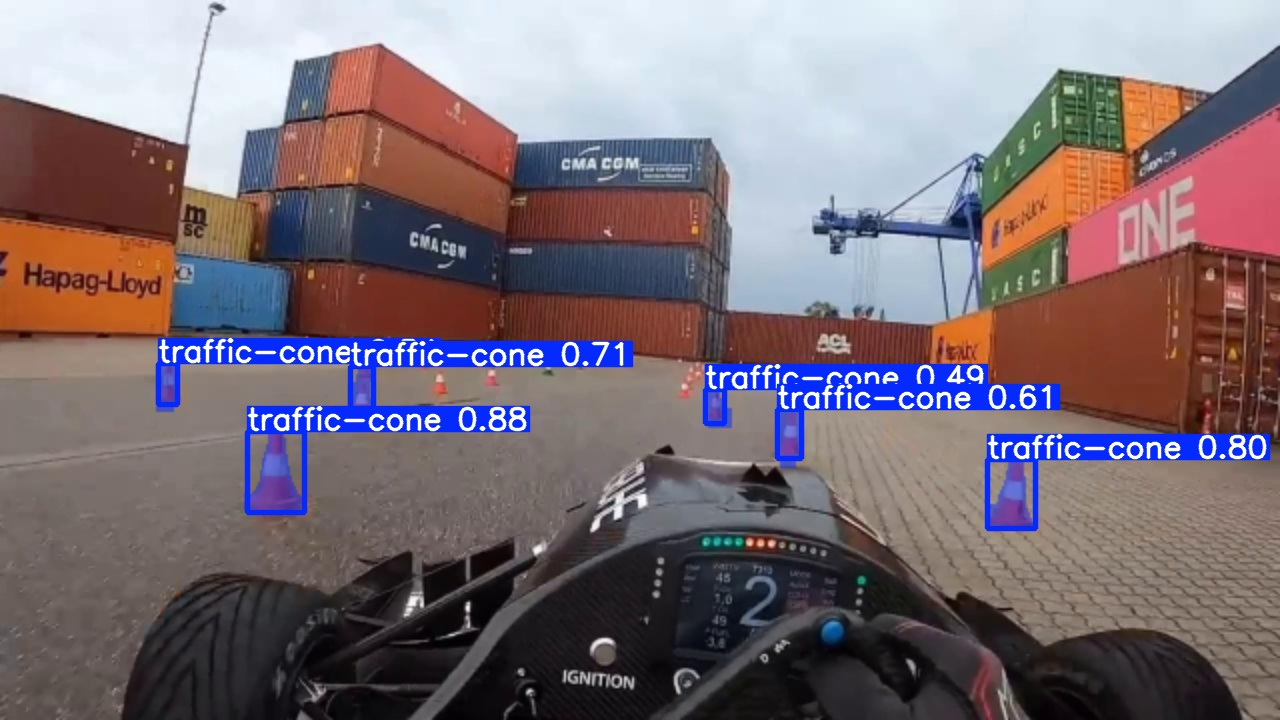

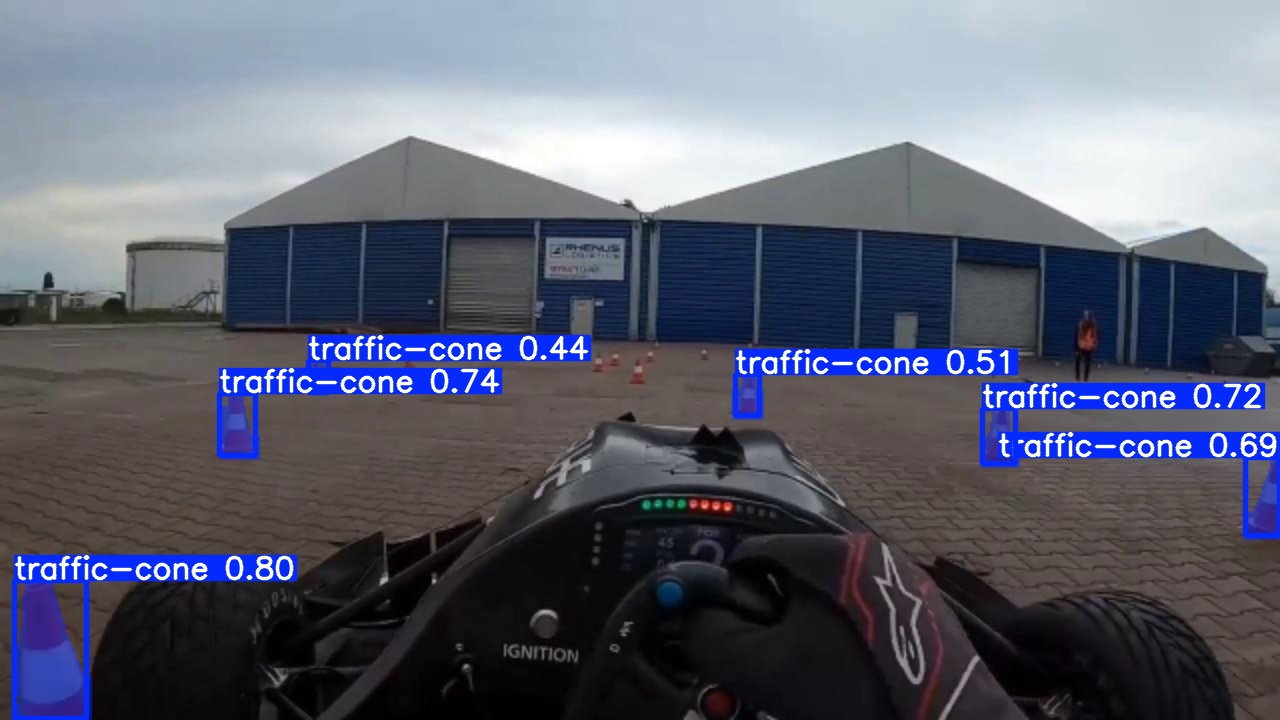

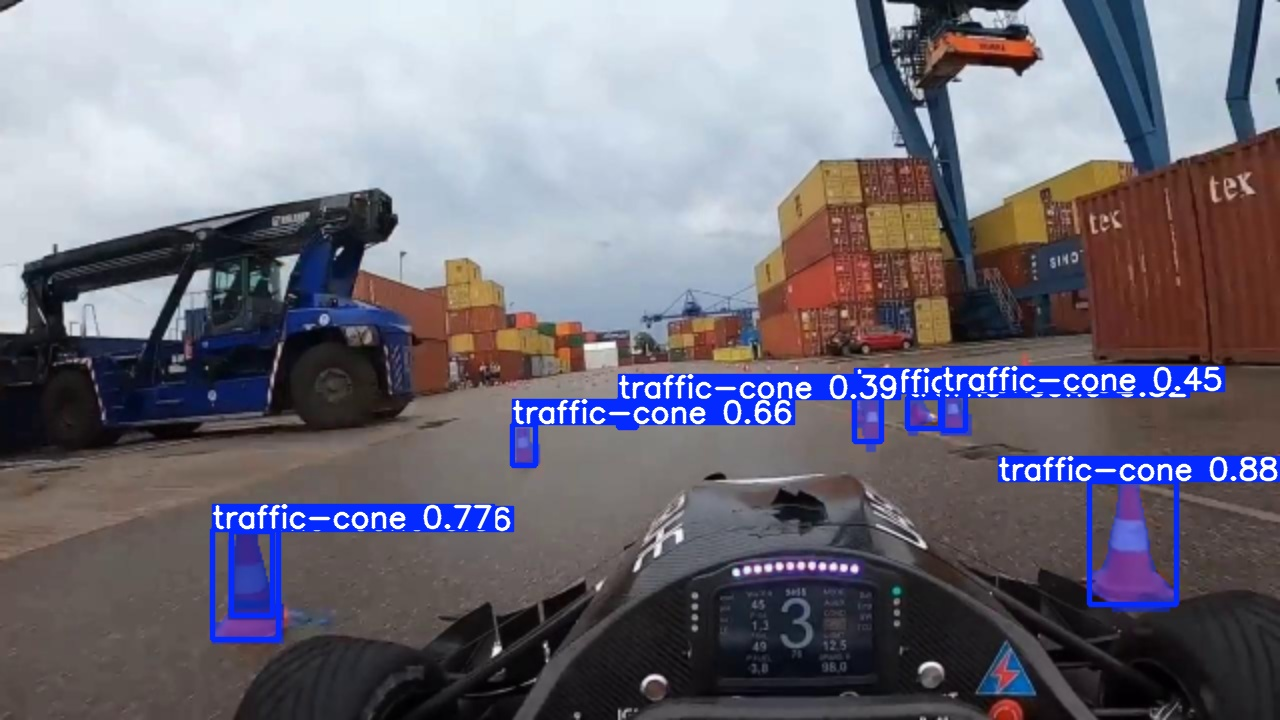

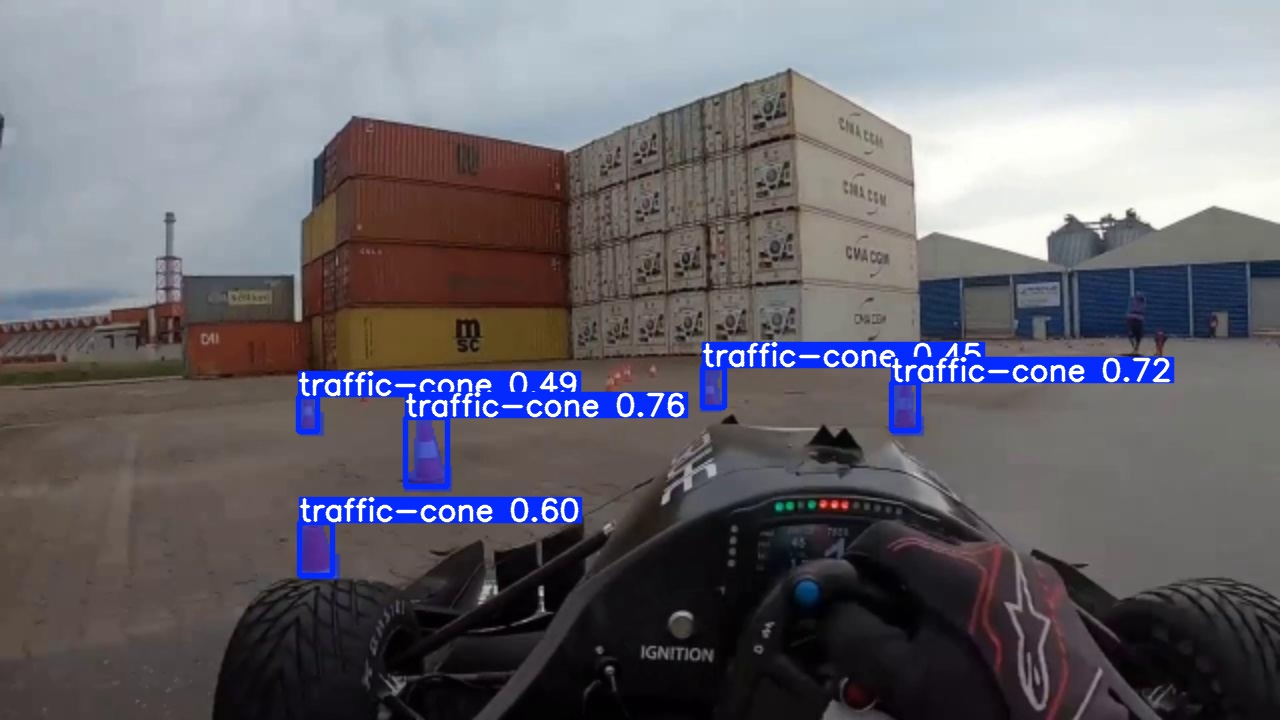

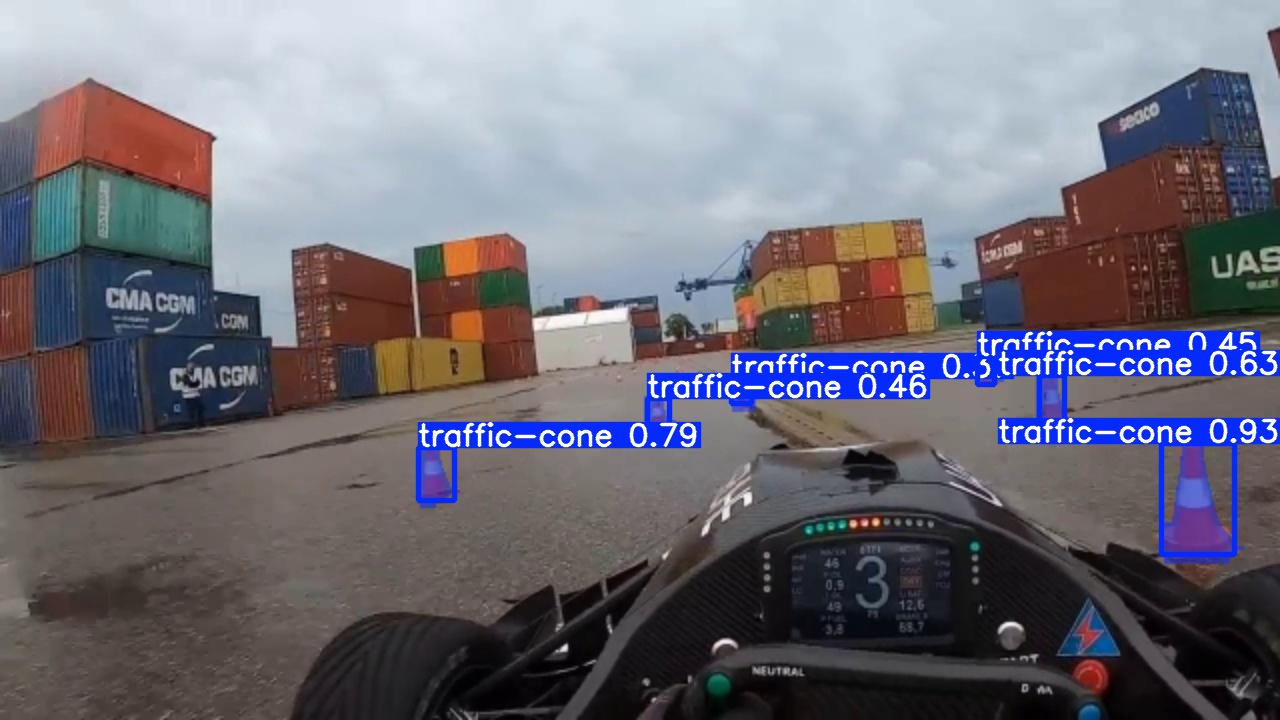

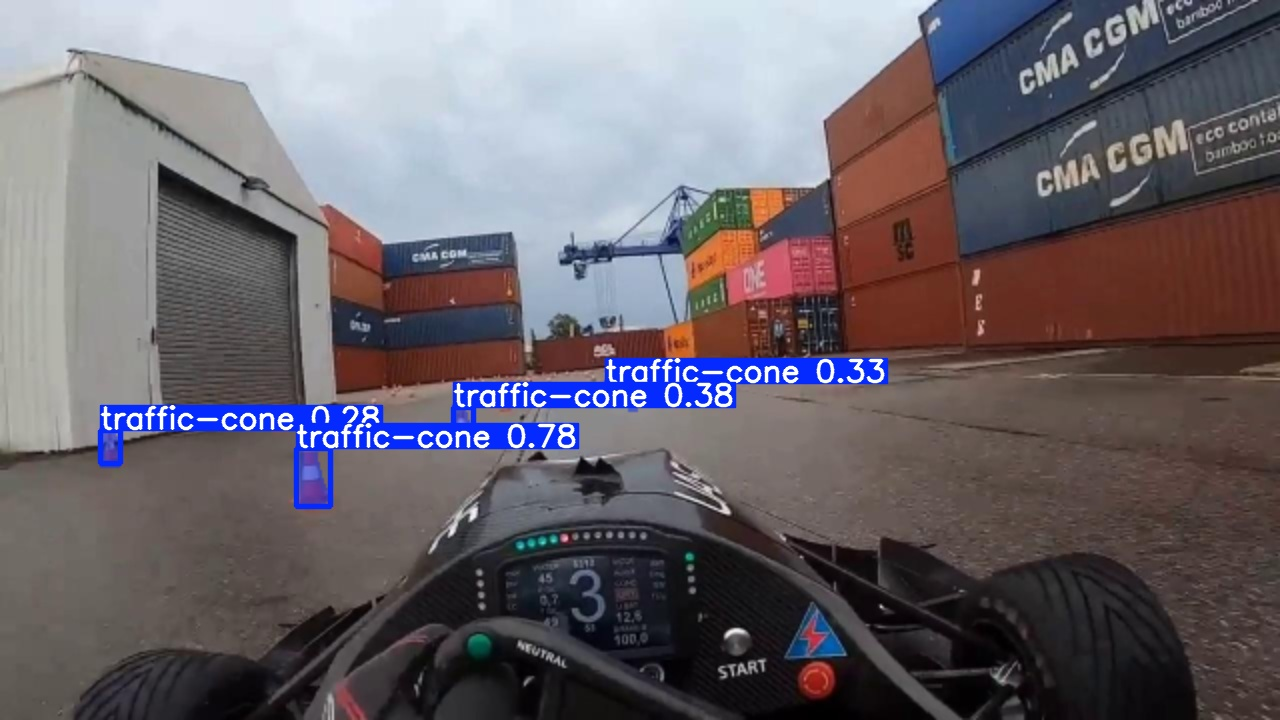

In [5]:
  import os
  import glob
  from IPython.display import display, Image
  from pathlib import Path

  # where we read the images from
  source_path = f'{HOME}/track images'

  # find out how many images we read
  directory = Path(source_path)
  files = [f for f in directory.iterdir() if f.is_file()]
  num_of_images = len(files)

  #run the model
  model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
  results = model.predict(source=source_path, conf=0.25, save=True)

  # find the folder containing the prediction results (most recent output folder) and the paths of the results
  results_base_path = '/content/runs/segment/'
  subfolders = [os.path.join(results_base_path, d) for d in os.listdir(results_base_path)
                if os.path.isdir(os.path.join(results_base_path, d)) and d.startswith('predict')]
  latest_folder = max(subfolders, key=os.path.getmtime)
  image_paths = glob.glob(f'{latest_folder}/*.jpg')[:num_of_images]

  # display results
  for image_path in image_paths:
      display(Image(filename=image_path, width=600))
      print("\n")

# Color Detection


Because we used a model that performs instance segmentation we can use the results to read the masks of cones in images.

I did not have time to implement the color detection because i have 6 assignments to hand in this week in different courses, and i was away from my laptop for most of the time we had for this assignment, but how i would do it is this:

- for each image:
  - for each cone detected in the image:
    - read the mask from the results
    - crop the pixels from the original image matching the pixels in the mask
    - calculate the cone's color in the following manner:
      - since the bottom of a cone always has the cone's main color, look at the bottom 10-20% of the rows from the original image crop, and average the pixel colors along the rows
      - if any row has an average color too close to white, filter it out
      - average all the avg row colors left, this color will represent the cone's rgb color
    - take the cone's rgb color, convert it to HSV colorspace, and detect the name of the color depending on the range this color lands on in HSV space.
    - now that we have the rgb values and name of the color, on the result image, below the bottom of the mask/box, add text box whose background color is the rgb values and the text written in it is the name of the color.

this mostly can be done with OpenCV and playing around with the results data
    


---

additional notes:
- as for calculating the cone's color, i could think of a few different ways to do so, for example K-means, or to randomly pick a few pixels from the bottom and top of each mask and average them and that would be the cone's rgb color.
which method is faster and gives more reliable results? i dont have time to test but i suspect the first method i provided, which is why i described it first.
- It's also possible to train the main model we used, to detect different types of cones depending on color, but that would require an appropriate dataset to train on.
- we convert to HSV space because it is a much easier colorspace to work with and seperate into different sections representing different colors, mostly dependent on hue, as can be seen in the image: [link](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/1600px-HSV_color_solid_cylinder.png?20151228061406).
videos i would work with if i had time demonstrating how this can be done: [link text](https://www.youtube.com/watch?v=t71sQ6WY7L4) [link text](https://www.youtube.com/watch?v=aFNDh5k3SjU).



# Closing Thoughts

After figuring out how to train custom models the main difficulty was just finding a proper dataset to train on.

at first i worked with a model trained for object detection, but later i realized instance segmentation would be more suited for the task if i also want to extract the masks of the cones (which is extremely helpful for the color detection part of the task, which i unfortunately did not have time for).
this also meant finding a better dataset suited for instance segmentation on cones and not just object detection, which proved to be a rather difficult task.